In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
import io
uploaded = files.upload()
rawDataSet = pd.read_csv(io.BytesIO(uploaded['predict_salary.csv']))

Saving predict_salary.csv to predict_salary.csv


In [0]:
indep=np.array(rawDataSet['Years Of Experience']).reshape(-1,1)
dep=np.array(rawDataSet['Salary']).reshape(-1,1)

from sklearn.model_selection import train_test_split
indep_train,indep_test,dep_train,dep_test=train_test_split(indep,dep,test_size=0.2,random_state=0)

# ***With Linear Regression***



> # **With Out Transformation**




In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(indep_train, dep_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
regressor.predict(indep_test)

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [7]:
dep_test

array([[ 37731],
       [122391],
       [ 57081],
       [ 63218],
       [116969],
       [109431]])

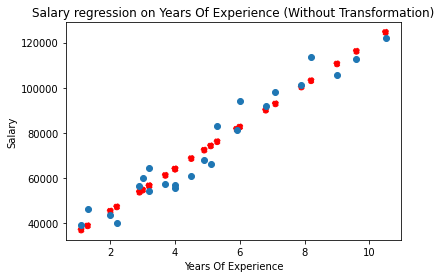

In [8]:
plt.scatter(indep_train,regressor.predict(indep_train),c='r',linestyle='--')
plt.scatter(indep_train,dep_train)
plt.title('Salary regression on Years Of Experience (Without Transformation)')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(dep_test,regressor.predict(indep_test)))

3580.979237321343



> # **With Transformation**



In [0]:
from sklearn.preprocessing import StandardScaler
indep_scaler=StandardScaler()
indep_train_scaler=indep_scaler.fit_transform(indep_train)
indep_test_scaler=indep_scaler.transform(indep_test)
dep_scaler=StandardScaler()
dep_train_scaler=dep_scaler.fit_transform(dep_train)

In [11]:
regressor = LinearRegression()
regressor.fit(indep_train_scaler, dep_train_scaler)
regressor.predict(indep_test_scaler)

array([[-1.33650786],
       [ 1.96876684],
       [-0.35994942],
       [-0.4350693 ],
       [ 1.66828733],
       [ 1.36780781]])

In [12]:
dep_scaler.inverse_transform(regressor.predict(indep_test_scaler))

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

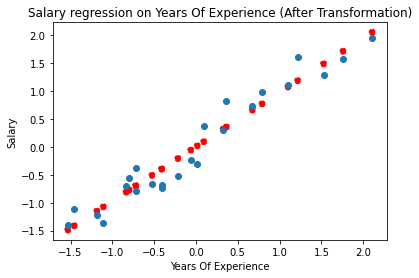

In [13]:
plt.scatter(indep_train_scaler,regressor.predict(indep_train_scaler),c='r',linestyle='--')
plt.scatter(indep_train_scaler,dep_train_scaler)
plt.title('Salary regression on Years Of Experience (After Transformation)')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
np.sqrt(mean_squared_error(dep_test,dep_scaler.inverse_transform(regressor.predict(indep_test_scaler))))

3580.979237321344

# ***Conclusion***
Both of the results are same here, but in some cases by transforming the scale we can able to generate less RMSE

# ***With Polynomial Features***

In [0]:
from sklearn.preprocessing import PolynomialFeatures
quadratic_features=PolynomialFeatures(degree=2)
indep_train_quadratic=quadratic_features.fit_transform(indep_train)
indep_test_quadratic=quadratic_features.transform(indep_test)

In [40]:
regressor_quad=LinearRegression()
regressor_quad.fit(indep_train_quadratic,dep_train)
regressor_quad.predict(indep_test_quadratic)

array([[ 40843.9467707 ],
       [122840.44243636],
       [ 64917.43648533],
       [ 63061.08126735],
       [115325.5713329 ],
       [107822.82907439]])

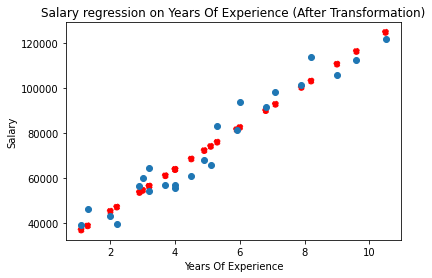

In [41]:
plt.scatter(indep_train,regressor_quad.predict(indep_train_quadratic),c='r',linestyle='--')
plt.scatter(indep_train,dep_train)
plt.title('Salary regression on Years Of Experience (After Transformation)')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [42]:
np.sqrt(mean_squared_error(dep_test,regressor_quad.predict(indep_test_quadratic)))

3573.3706750523143

# ***Final Conclusion***

> If we implement the above problem with polynomial features with degree 2, RMSE
is lesser with compare to the implementation of noraml linear regression. If 
we use higher degree, it RMSE is also increasing, i.e. the model becomes 
overfitted. So, the above problem should be implemented as linear regression
with polynomial features of degree 2 to achive more accuracy.


